## Exploratory data analysis file pre-modelling

#### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#### read cleaned data frame

In [2]:
df = pd.read_feather('../data/processed/clean_ft_table_labs')

In [3]:
df_features = df.copy()

In [4]:
df_features.drop(['hadm_id','endtime'],axis=1,inplace=True)

In [5]:
df_features

,time_on_vent,re_intub_class,gender,admission_type,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,...,creatinine,bun,height,lactic_acid,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,pulseox
0,25.983333,0,F,EW EMER.,72,19.0,79.0,3.718759,123.2,139.0,...,2.2,14.0,59.921260,8.1,9.2,12.2,387.0,36.444444,20.347548,100.0
1,17.000000,0,M,EW EMER.,23,33.0,122.0,3.577709,264.0,132.0,...,0.7,23.0,70.933071,0.9,12.2,8.3,527.0,39.166667,6.350853,96.0
2,580.233333,0,F,EW EMER.,81,24.0,63.0,1.788854,198.0,140.0,...,0.8,29.0,61.905512,1.0,9.4,16.0,437.0,36.833333,6.418723,96.0
3,83.866667,0,F,EW EMER.,61,18.0,73.0,8.455767,199.5,139.0,...,0.9,23.0,66.070866,1.2,8.4,24.3,556.0,36.444444,7.366591,100.0
4,160.350000,0,F,EW EMER.,62,33.0,96.0,5.962682,136.8,140.0,...,0.8,12.0,57.043307,1.7,9.5,11.8,417.0,36.944444,2.190890,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,10.416667,1,M,EW EMER.,85,15.0,71.0,1.870829,139.5,134.0,...,1.4,18.0,66.964567,1.0,8.1,10.0,498.0,36.888889,3.817254,100.0
6558,134.333333,1,F,EW EMER.,68,15.0,108.0,10.264556,77.4,139.0,...,0.5,13.0,59.921260,1.0,9.8,20.4,320.0,37.611111,13.441230,96.0
6559,73.466667,1,F,DIRECT EMER.,65,13.0,94.0,1.863525,139.0,131.0,...,2.9,62.0,61.011811,1.0,10.3,18.6,519.0,37.055556,3.761299,96.0
6560,218.083333,1,F,EW EMER.,53,17.0,80.0,1.772811,160.6,142.0,...,0.5,13.0,64.086614,1.4,9.0,10.7,308.0,36.888889,12.378938,100.0


In [6]:
from scipy.stats import shapiro, normaltest

In [7]:
df_continuous = df_features.copy()

In [8]:
df_continuous.drop(['re_intub_class','gender','admission_type'],axis=1,inplace=True)

In [9]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,creatinine,bun,height,lactic_acid,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,pulseox
0,25.983333,72,19.0,79.0,3.718759,123.2,139.0,267.0,7.55,22.0,...,2.2,14.0,59.921260,8.1,9.2,12.2,387.0,36.444444,20.347548,100.0
1,17.000000,23,33.0,122.0,3.577709,264.0,132.0,162.0,7.41,23.0,...,0.7,23.0,70.933071,0.9,12.2,8.3,527.0,39.166667,6.350853,96.0
2,580.233333,81,24.0,63.0,1.788854,198.0,140.0,77.0,7.48,26.0,...,0.8,29.0,61.905512,1.0,9.4,16.0,437.0,36.833333,6.418723,96.0
3,83.866667,61,18.0,73.0,8.455767,199.5,139.0,107.0,7.39,26.0,...,0.9,23.0,66.070866,1.2,8.4,24.3,556.0,36.444444,7.366591,100.0
4,160.350000,62,33.0,96.0,5.962682,136.8,140.0,298.0,7.48,22.0,...,0.8,12.0,57.043307,1.7,9.5,11.8,417.0,36.944444,2.190890,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,10.416667,85,15.0,71.0,1.870829,139.5,134.0,224.0,7.37,26.0,...,1.4,18.0,66.964567,1.0,8.1,10.0,498.0,36.888889,3.817254,100.0
6558,134.333333,68,15.0,108.0,10.264556,77.4,139.0,93.0,7.42,26.0,...,0.5,13.0,59.921260,1.0,9.8,20.4,320.0,37.611111,13.441230,96.0
6559,73.466667,65,13.0,94.0,1.863525,139.0,131.0,156.0,7.36,21.0,...,2.9,62.0,61.011811,1.0,10.3,18.6,519.0,37.055556,3.761299,96.0
6560,218.083333,53,17.0,80.0,1.772811,160.6,142.0,105.0,7.42,34.0,...,0.5,13.0,64.086614,1.4,9.0,10.7,308.0,36.888889,12.378938,100.0


In [10]:
df_continuous.apply(normaltest)

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,creatinine,bun,height,lactic_acid,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,pulseox
0,5802.07604,2.482169e+02,5.911488e+02,2.043863e+02,14305.781722,2094.367322,2.583239e+02,21702.76176,21702.867896,5.302645e+02,...,4598.146472,3039.621101,2860.667883,21702.867876,3.598965e+02,9521.876758,1.092762e+03,14183.394517,10662.966769,9980.477374
1,0.00000,1.260055e-54,4.302061e-129,4.150274e-45,0.000000,0.000000,8.047613e-57,0.00000,0.000000,7.153547e-116,...,0.000000,0.000000,0.000000,0.000000,7.070861e-79,0.000000,5.126118e-238,0.000000,0.000000,0.000000


In [11]:
df_continuous.apply(shapiro)

/home/anne_717/anaconda3/envs/extumate/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,creatinine,bun,height,lactic_acid,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,pulseox
0,0.650761,9.751495e-01,9.790351e-01,9.878800e-01,0.485489,0.914963,9.864508e-01,0.004615,0.00426,9.709337e-01,...,0.649823,0.799052,0.743552,0.004264,9.737567e-01,0.698073,9.520987e-01,0.214179,0.487499,0.651779
1,0.000000,2.658465e-32,4.982681e-30,2.687067e-23,0.000000,0.000000,1.359089e-24,0.000000,0.00000,1.789486e-34,...,0.000000,0.000000,0.000000,0.000000,4.755977e-33,0.000000,6.814514e-42,0.000000,0.000000,0.000000


#### importantly, no columns appear to be normally distributed using either normality test

<AxesSubplot:xlabel='pulseox', ylabel='Count'>

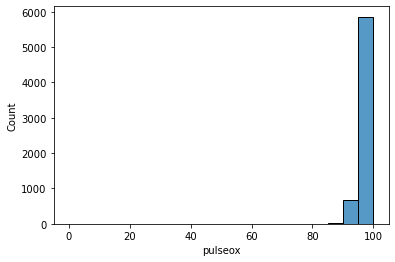

In [12]:
sns.histplot(df_features['pulseox'], bins = 20)

#### Remove outliers by removing all values with a zscore +/- 4

In [13]:
summary_stats = df_continuous.describe()

In [14]:
summary_stats

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,creatinine,bun,height,lactic_acid,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,pulseox
count,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,...,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000,6562.000000
mean,108.040221,62.015696,19.447831,86.412831,4.444946,186.123551,139.482094,427.499086,312.192341,25.224931,...,1.372943,28.216855,66.567084,306.226504,9.762024,12.256099,479.347136,36.983793,8.906753,97.598293
std,143.096898,16.300474,5.854213,17.261708,3.829302,55.646766,4.789115,17454.687614,17456.618999,4.928602,...,1.314319,22.229054,5.432982,17456.723191,1.716487,7.233527,148.166916,1.721733,8.578855,2.955987
min,6.016667,18.000000,0.000000,0.000000,0.000000,56.000000,115.000000,25.000000,6.920000,9.000000,...,0.000000,1.000000,0.000000,0.300000,0.000000,0.100000,101.000000,-17.777778,0.000000,0.000000
25%,21.483333,52.000000,15.500000,74.000000,2.439913,149.600000,136.000000,91.000000,7.370000,22.000000,...,0.700000,14.000000,64.086614,1.000000,8.500000,8.200000,380.000000,36.722222,5.010614,96.000000
50%,60.141667,63.000000,19.000000,85.000000,3.777124,176.400000,139.000000,112.000000,7.410000,25.000000,...,0.900000,21.000000,66.964567,1.300000,9.500000,11.100000,457.000000,37.000000,7.277820,98.000000
75%,140.516667,74.000000,23.000000,97.000000,5.951815,213.400000,142.000000,142.000000,7.450000,28.000000,...,1.500000,35.000000,70.039370,1.700000,10.800000,14.700000,553.000000,37.388889,10.490075,100.000000
max,2389.733333,91.000000,66.000000,173.000000,160.603722,605.000000,166.000000,999999.000000,999999.000000,50.000000,...,13.600000,276.000000,175.098425,999999.000000,17.700000,250.200000,1602.000000,40.000000,296.433466,100.000000


In [15]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,creatinine,bun,height,lactic_acid,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,pulseox
0,25.983333,72,19.0,79.0,3.718759,123.2,139.0,267.0,7.55,22.0,...,2.2,14.0,59.921260,8.1,9.2,12.2,387.0,36.444444,20.347548,100.0
1,17.000000,23,33.0,122.0,3.577709,264.0,132.0,162.0,7.41,23.0,...,0.7,23.0,70.933071,0.9,12.2,8.3,527.0,39.166667,6.350853,96.0
2,580.233333,81,24.0,63.0,1.788854,198.0,140.0,77.0,7.48,26.0,...,0.8,29.0,61.905512,1.0,9.4,16.0,437.0,36.833333,6.418723,96.0
3,83.866667,61,18.0,73.0,8.455767,199.5,139.0,107.0,7.39,26.0,...,0.9,23.0,66.070866,1.2,8.4,24.3,556.0,36.444444,7.366591,100.0
4,160.350000,62,33.0,96.0,5.962682,136.8,140.0,298.0,7.48,22.0,...,0.8,12.0,57.043307,1.7,9.5,11.8,417.0,36.944444,2.190890,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,10.416667,85,15.0,71.0,1.870829,139.5,134.0,224.0,7.37,26.0,...,1.4,18.0,66.964567,1.0,8.1,10.0,498.0,36.888889,3.817254,100.0
6558,134.333333,68,15.0,108.0,10.264556,77.4,139.0,93.0,7.42,26.0,...,0.5,13.0,59.921260,1.0,9.8,20.4,320.0,37.611111,13.441230,96.0
6559,73.466667,65,13.0,94.0,1.863525,139.0,131.0,156.0,7.36,21.0,...,2.9,62.0,61.011811,1.0,10.3,18.6,519.0,37.055556,3.761299,96.0
6560,218.083333,53,17.0,80.0,1.772811,160.6,142.0,105.0,7.42,34.0,...,0.5,13.0,64.086614,1.4,9.0,10.7,308.0,36.888889,12.378938,100.0


In [16]:
cols = list(df_continuous.columns)
df_new = df_continuous.copy()
for col in cols:
    df_new[col] = (df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()

In [17]:
for col in cols:
    df_continuous[col] = np.where(((df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()>4)|
                                  ((df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()<-4),
                                  np.NaN,df_continuous[col])

In [18]:
df_continuous.isnull().sum()

time_on_vent         64
anchor_age            0
spontrr              11
heartrate            10
std_spontrr           6
weight               34
sodium               10
abg_po2               2
abg_ph                2
hco3                  8
abg_pco2              2
bloodpressure        18
std_pulseox          32
std_heartrate         1
creatinine           85
bun                  50
height               27
lactic_acid           2
hemoglobin            4
wbg                  36
tidalvolume          13
temp                 13
std_bloodpressure    58
pulseox              16
dtype: int64

In [19]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,creatinine,bun,height,lactic_acid,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,pulseox
0,25.983333,72.0,19.0,79.0,3.718759,123.2,139.0,267.0,7.55,22.0,...,2.2,14.0,59.921260,8.1,9.2,12.2,387.0,36.444444,20.347548,100.0
1,17.000000,23.0,33.0,122.0,3.577709,264.0,132.0,162.0,7.41,23.0,...,0.7,23.0,70.933071,0.9,12.2,8.3,527.0,39.166667,6.350853,96.0
2,580.233333,81.0,24.0,63.0,1.788854,198.0,140.0,77.0,7.48,26.0,...,0.8,29.0,61.905512,1.0,9.4,16.0,437.0,36.833333,6.418723,96.0
3,83.866667,61.0,18.0,73.0,8.455767,199.5,139.0,107.0,7.39,26.0,...,0.9,23.0,66.070866,1.2,8.4,24.3,556.0,36.444444,7.366591,100.0
4,160.350000,62.0,33.0,96.0,5.962682,136.8,140.0,298.0,7.48,22.0,...,0.8,12.0,57.043307,1.7,9.5,11.8,417.0,36.944444,2.190890,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,10.416667,85.0,15.0,71.0,1.870829,139.5,134.0,224.0,7.37,26.0,...,1.4,18.0,66.964567,1.0,8.1,10.0,498.0,36.888889,3.817254,100.0
6558,134.333333,68.0,15.0,108.0,10.264556,77.4,139.0,93.0,7.42,26.0,...,0.5,13.0,59.921260,1.0,9.8,20.4,320.0,37.611111,13.441230,96.0
6559,73.466667,65.0,13.0,94.0,1.863525,139.0,131.0,156.0,7.36,21.0,...,2.9,62.0,61.011811,1.0,10.3,18.6,519.0,37.055556,3.761299,96.0
6560,218.083333,53.0,17.0,80.0,1.772811,160.6,142.0,105.0,7.42,34.0,...,0.5,13.0,64.086614,1.4,9.0,10.7,308.0,36.888889,12.378938,100.0


In [20]:
df_continuous.dropna(inplace=True)

In [21]:
df_continuous.apply(normaltest)

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,creatinine,bun,height,lactic_acid,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,pulseox
0,2381.377007,2.387406e+02,9.670699e+01,1.462771e+02,6.910250e+02,8.127505e+02,1.186271e+02,4110.357947,2.630662e+02,3.922811e+02,...,3024.469673,1945.831882,5.821455e+01,5921.583482,3.204202e+02,1.212170e+03,6.314790e+02,4.191937e+02,2100.798271,8.942951e+02
1,0.000000,1.439285e-52,1.000793e-21,1.723148e-32,8.827519e-151,3.261943e-177,1.739593e-26,0.000000,7.514507e-58,6.564989e-86,...,0.000000,0.000000,2.284917e-13,0.000000,2.640165e-70,6.033313e-264,7.517609e-138,9.402714e-92,0.000000,6.401584e-195


In [22]:
df_continuous.apply(shapiro)

/home/anne_717/anaconda3/envs/extumate/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,creatinine,bun,height,lactic_acid,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,pulseox
0,0.771665,9.742023e-01,9.906796e-01,9.904367e-01,9.369218e-01,9.561652e-01,9.899745e-01,0.764825,9.890028e-01,9.732051e-01,...,0.726871,0.833911,9.862221e-01,0.770857,9.758216e-01,9.339436e-01,9.622933e-01,9.719533e-01,0.880081,0.875163
1,0.000000,8.208790e-32,1.225900e-19,6.593193e-20,4.203895e-45,2.199692e-39,2.087801e-20,0.000000,2.097116e-21,2.515848e-32,...,0.000000,0.000000,6.055126e-24,0.000000,6.056061e-31,1.401298e-45,3.794677e-37,5.978079e-33,0.000000,0.000000


In [23]:
df_categorical = df_features.copy()
df_categorical = df_features[['re_intub_class','gender','admission_type']]

In [24]:
df_to_model = pd.merge(left = df_continuous, right=df_categorical, how = 'inner',left_index = True, right_index = True)

In [25]:
from scipy.stats import boxcox

In [26]:
df_to_model['std_spontrr']= boxcox((df_to_model['std_spontrr']+1),0)
df_to_model['std_pulseox']= boxcox((df_to_model['std_pulseox']+1),0)
df_to_model['std_heartrate']= boxcox((df_to_model['std_heartrate']+1),0)
df_to_model['std_bloodpressure']= boxcox((df_to_model['std_bloodpressure']+1),0)
df_to_model['time_on_vent']= boxcox(df_to_model['time_on_vent'],0)   #time_on_vent and anchor age transformations not great
df_to_model['anchor_age'] = df_to_model['anchor_age']**2

df_to_model['creatinine']= boxcox((df_to_model['creatinine']+1),0)

In [27]:
df_to_model['bun']= boxcox((df_to_model['bun']+1),0)

In [28]:
#df_to_model['newpulse'] = df_to_model['pulseox']

In [29]:
df_to_model.reset_index(inplace=True)
df_to_model.drop('index',axis=1,inplace=True)

<AxesSubplot:>

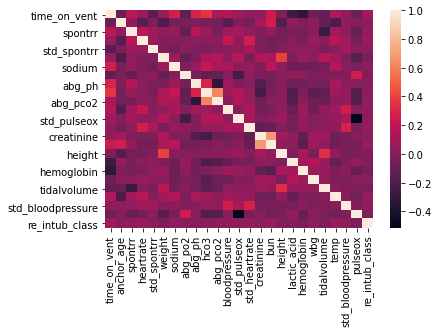

In [30]:
sns.heatmap(df_to_model.corr())

In [31]:
from scipy.stats import boxcox

<AxesSubplot:xlabel='pulseox', ylabel='Count'>

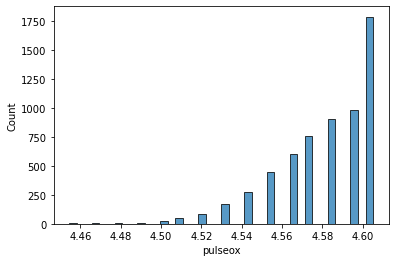

In [32]:
sns.histplot(np.log(df_continuous['pulseox']), bins = 40)

<AxesSubplot:xlabel='abg_pco2', ylabel='Count'>

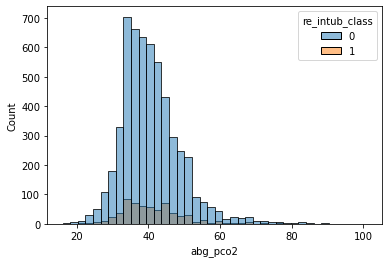

In [33]:
sns.histplot(df_to_model, x = 'abg_pco2', hue = 're_intub_class', bins = 40)

In [34]:
df_to_model['tidal_weight'] = df_to_model['tidalvolume']/ df_to_model['weight']

In [35]:
#df_to_model.drop(['tidalvolume','weight'],axis=1,inplace=True)

In [36]:
df_to_model.describe()

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,height,lactic_acid,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,pulseox,re_intub_class,tidal_weight
count,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,...,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,3.989394,4133.175487,19.366213,86.234966,1.572434,184.168891,139.469359,123.078486,7.410403,25.205964,...,66.647441,1.441098,9.786449,11.976294,477.771320,37.060777,2.111657,97.677536,0.101753,2.741510
std,1.150592,1924.971325,5.655665,16.915997,0.459501,50.998170,4.681327,53.582621,0.060945,4.827712,...,4.153010,0.727367,1.705982,5.578417,144.211489,0.581540,0.479098,2.312429,0.302348,0.992293
min,1.794533,324.000000,0.000000,40.000000,0.000000,56.000000,121.000000,25.000000,6.920000,10.000000,...,46.031496,0.300000,4.900000,0.100000,101.000000,34.111111,0.000000,86.000000,0.000000,0.395496
25%,3.045316,2756.500000,15.000000,74.000000,1.232552,149.200000,136.000000,91.000000,7.370000,22.000000,...,64.086614,1.000000,8.500000,8.200000,380.000000,36.722222,1.791204,96.000000,0.000000,2.070577
50%,4.049754,4096.000000,19.000000,85.000000,1.560395,176.000000,139.000000,112.000000,7.410000,25.000000,...,66.964567,1.300000,9.600000,11.100000,457.000000,37.000000,2.107493,98.000000,0.000000,2.611317
75%,4.904781,5476.000000,23.000000,97.000000,1.934721,212.000000,142.000000,142.000000,7.450000,28.000000,...,70.039370,1.700000,10.800000,14.600000,553.000000,37.388889,2.425918,100.000000,0.000000,3.265833
max,6.515601,8281.000000,42.000000,154.000000,2.854031,407.000000,158.000000,594.000000,7.640000,44.000000,...,81.944882,18.300000,16.600000,41.100000,1063.000000,40.000000,3.744494,100.000000,1.000000,9.829545


In [37]:
#df_continuous.reset_index(inplace=True)
#df_continuous.drop('index',axis=1,inplace=True)

In [38]:
df_to_model.to_feather('../data/processed/df_to_model_labs')